# Notebook Title: Data Insights from Cleaning Audits – A Strategic Approach Using Data Science

# 0. Introduction: What is Data Science?

# 0.1 **Data Science** is the field that uses scientific methods, algorithms, and systems to extract insights and value from data. 

In a business context, it empowers decision-making by transforming raw data into actionable intelligence.

Despite the perception that large volumes of data are required, even small datasets can reveal operational inefficiencies and opportunities for improvement.

This project demonstrates how **data from cleaning audits**, even if limited, can drive **strategic insights** that support our company’s goals, enhance client satisfaction, and strengthen performance accountability.


# 1.0. Library

## 1.1. Imports 

In [5]:
# Importlibraries  
import pandas            as pd  
import numpy             as np  
import seaborn           as sns 
import matplotlib.pyplot as plt 

import calendar

from datetime import datetime 

## 1.1.2 Adjusts

In [6]:
# Set a modern and clear visual style  
plt.style.use('seaborn-v0_8')  

# 2.0. Function Definition and Structure

In [7]:
import pandas as pd

def load_and_prepare_excel(file_path):
    try:
        # Load sheets with the correct header row for each
        sheets = {
            'summary': pd.read_excel(file_path, sheet_name='Summary '),
            'jan': pd.read_excel(file_path, sheet_name='January 25', header=1),
            'feb': pd.read_excel(file_path, sheet_name='Feb 25', header=1),
            'mar': pd.read_excel(file_path, sheet_name='March 25', header=1)
        }
    except Exception as e:
        print('Error loading Excel file:', e)
        return None

    # Clean and standardize each sheet
    for df in sheets.values():
        df.columns = df.columns.str.strip()  # Remove leading/trailing spaces from column names
        df.dropna(how='all', inplace=True)   # Remove empty rows

        # Convert 'Date Completed' to datetime
        if 'Date Completed' in df.columns:
            df['Date Completed'] = pd.to_datetime(df['Date Completed'], errors='coerce')

    return sheets


# Example of loading the data
file_path = 'Copy of TCE Checklist-questionaire.xlsx'
data_frames = load_and_prepare_excel(file_path)



# 3.0. Data Loading and Preview

In [8]:
# Load Excel data
excel_file = 'Copy of TCE Checklist-questionaire.xlsx'
data_frames = load_and_prepare_excel(excel_file)

# Check if loading was successful
if data_frames is None:
    print("There was an error loading the data.")
else:
    print("Sheets loaded successfully:")
    for name in data_frames:
        print(f"- {name} (rows: {data_frames[name].shape[0]})")

    # Preview the summary sheet
    print("\nSummary DataFrame Preview:")
    display(data_frames['summary'].head())


Sheets loaded successfully:
- summary (rows: 12)
- jan (rows: 55)
- feb (rows: 110)
- mar (rows: 108)

Summary DataFrame Preview:


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,Total completed,55.0000,NaN
1,NaN,NaN,Pass,22.0000,0.4
2,NaN,NaN,Failure,33.0000,0.6
3,NaN,NaN,Average,0.3666,NaN
17,NaN,NaN,February Total completed,109.0000,NaN


# 3.1. Merge Monthly Data into One Master Dataset

In [9]:
# Merge monthly data
df_monthly = pd.concat([data_frames['jan'], data_frames['feb'], data_frames['mar']], keys=['Jan', 'Feb', 'Mar'], names=['Month', 'Row'])

# Reset index for clarity
df_monthly.reset_index(inplace=True)

# Standardize columns
df_monthly.columns = df_monthly.columns.str.strip().str.lower().str.replace(' ', '_')

#Convert 'score' column to numeric
df_monthly['score'] = pd.to_numeric(df_monthly['score'], errors='coerce')

# Preview
df_monthly.head()


,month,row,unnamed:_0,date_completed,site,answered_by,percentage_received,score,questionarie_result,yes,...,unnamed:_5,unnamed:_6,unnamed:_7,unnamed:_8,unnamed:_9,unnamed:_10,unnamed:_11,unnamed:_12,unnamed:_13,week_1
0,Jan,0,NaN,2025-01-23,70-72 Jermyn Street,Joao Martire,100.00,NaN,Pass,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Jan,1,NaN,2025-01-23,Marquis House 67-68 Jermyn St,Joao Martire,94.44,NaN,Failure,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jan,2,NaN,2025-01-23,Cording House ( 34 St. James's St.),Joao Martire,100.00,NaN,Pass,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jan,3,NaN,2025-01-23,Albany house,Lavina Neta,100.00,NaN,Pass,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jan,4,NaN,2025-01-24,205 regent street,Arthur Carval,94.44,NaN,Failure,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 4.0. Descriptive analysis

In [10]:
# Now, Generate some insights 
# Storytelling for the director:  **Niel**
# Imagine this: Our cleaning audit data holds secrets to operational excellence and future growth.  
# With these insights, we can demonstrate how our performance has evolved over time and pinpoint areas of success and improvement.  

## 4.1. Approved Questionnaire

/var/folders/vp/z0zsw7sd3z1g0l663x5px37r0000gn/T/ipykernel_81688/1085283633.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_frames['jan'], x='Questionarie Result', palette='Set2')


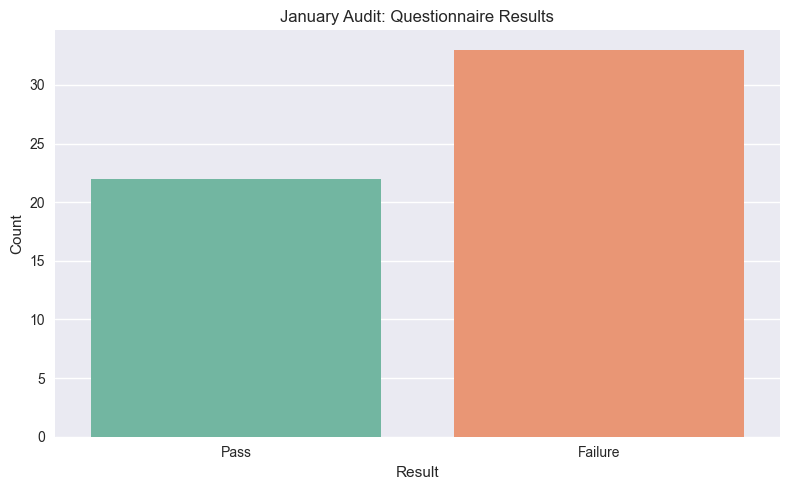

In [11]:
#Analysis of Questionnaire Results (Pass/Fail) from the January sheet  

if 'Questionarie Result' in data_frames['jan'].columns:  
    plt.figure(figsize=(8, 5))  
    sns.countplot(data=data_frames['jan'], x='Questionarie Result', palette='Set2')  
    plt.title("January Audit: Questionnaire Results")  
    plt.xlabel("Result")  
    plt.ylabel("Count")  
    plt.tight_layout()  
    plt.show()  
else:  
    print("Column 'Questionarie Result' not found in January data.")  
  

## 4.2. Score Analysis Over Time

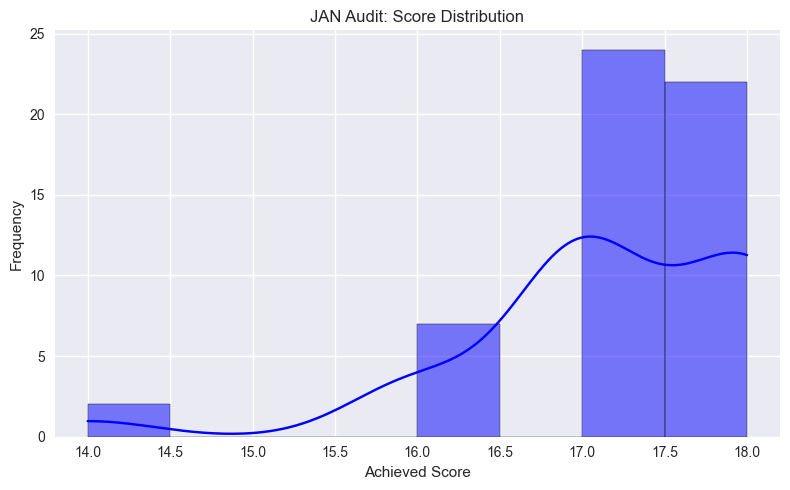

Score column not found in feb data.


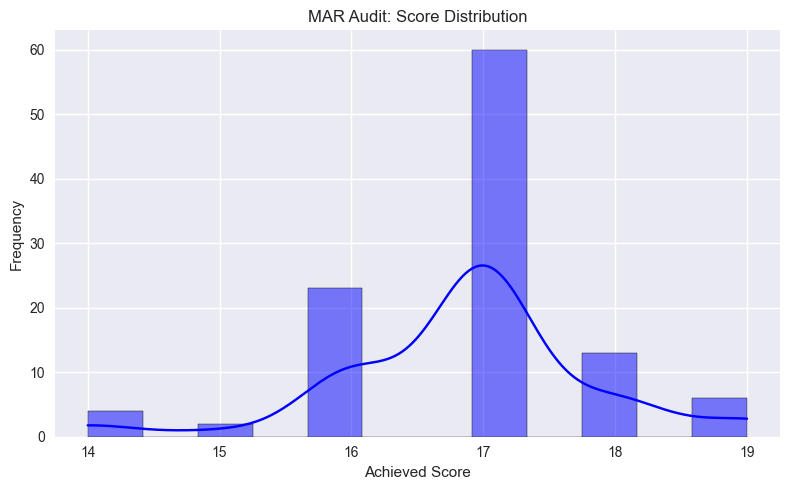

In [12]:
for label in ['jan', 'feb', 'mar']:  
    if 'Score' in data_frames[label].columns:  
        # Convert to numeric if score is in text form like '18/18'  
        # We assume the numerator represents achieved points.  
        def extract_score(score_str):  
            try:  
                if isinstance(score_str, str) and '/' in score_str:  
                    achieved = score_str.split('/')[0]  
                    return float(achieved)  
                return float(score_str)  
            except:  
                return np.nan  # Use np.nan for invalid or missing values
                  
        data_frames[label]['Numeric Score'] = data_frames[label]['Score'].apply(extract_score)  
          
        plt.figure(figsize=(8, 5))  
        sns.histplot(data=data_frames[label], x='Numeric Score', kde=True, color='blue')  
        plt.title(label.upper() + " Audit: Score Distribution")  
        plt.xlabel("Achieved Score")  
        plt.ylabel("Frequency")  
        plt.tight_layout()  
        plt.show()  
    else:  
        print("Score column not found in " + label + " data.")


## 4.3.Trends in percentage received 

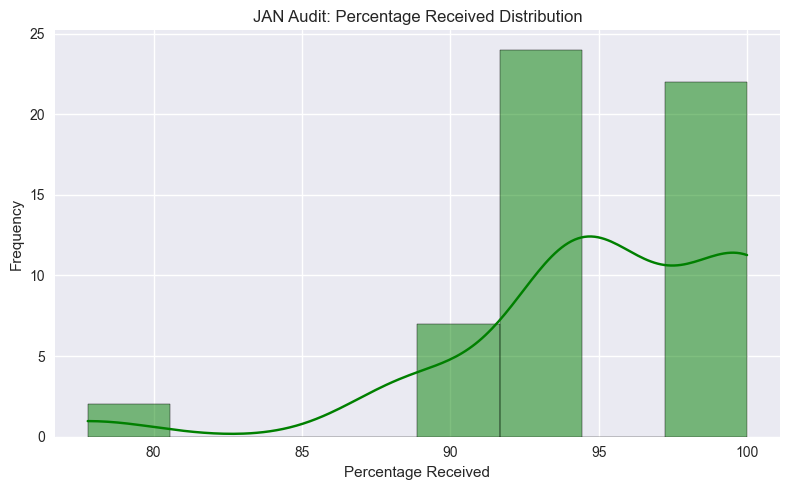

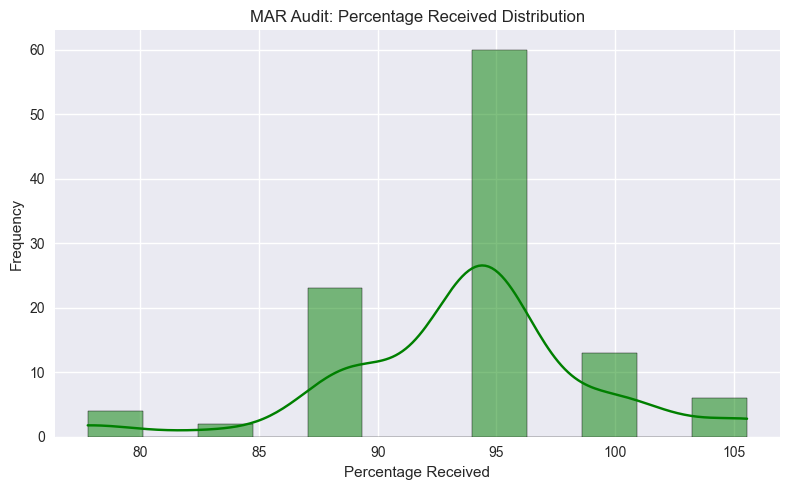

In [13]:
for label in ['jan', 'feb', 'mar']:  
    if 'Percentage Received' in data_frames[label].columns:  
        # Convert to numeric  
        data_frames[label]['Percentage Received'] = pd.to_numeric(data_frames[label]['Percentage Received'], errors='coerce')  
        plt.figure(figsize=(8, 5))  
        sns.histplot(data=data_frames[label], x='Percentage Received', kde=True, color='green')  
        plt.title(label.upper() + " Audit: Percentage Received Distribution")  
        plt.xlabel("Percentage Received")  
        plt.ylabel("Frequency")  
        plt.tight_layout()  

## 4.4.Trends in percentage received 

In [14]:
# Basic KPIs
total_audits = df_monthly.shape[0]
average_score = df_monthly['score'].mean()
low_score_count = (df_monthly['score'] < 80).sum()

# Show KPIs
print(f"Total audits: {total_audits}")
print(f"Average Score: {average_score:.2f}")
print(f"Audits below threshold (80): {low_score_count}")


Total audits: 273
Average Score: nan
Audits below threshold (80): 0


In [15]:
# Closing message for the presentation:  
print("\nThe analysis demonstrates that our current audit data holds valuable insights. With further data-driven refinements, we can identify key opportunities to enhance cleaning performance and drive growth. This is just the beginning of how data can revolutionize operational excellence.") 


The analysis demonstrates that our current audit data holds valuable insights. With further data-driven refinements, we can identify key opportunities to enhance cleaning performance and drive growth. This is just the beginning of how data can revolutionize operational excellence.


Explanation for the Director (Storytelling):
Intuitive Visuals: The charts provide a quick snapshot of our audit results, highlighting clear performance metrics (e.g., how many audits pass or fail).
Trustworthy Data Analysis: By extracting actionable insights from historical data, we can pinpoint where improvements matter most.
Growth Opportunity: This initial analysis is just a starting point. With more detailed models and deeper insights (like predictive analytics), we can support smarter decisions that drive operational success and revenue growth.
This blended code not only shows technical prowess but also tells a story that resonates with a director's need for clear, impactful business value.